# Libraries

In [1]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Load the Data

In [3]:
data = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop('Name', axis = 1, inplace = True)
data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Look at The Data

In [5]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(16719, 15)

In [6]:
# Look at the columns names.
data.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
# Let's check the data, to see if there is duplicate data or not
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16714     True
16715    False
16716     True
16717    False
16718    False
Length: 16719, dtype: bool

In [8]:
# We are looking for duplicate rows.
data.duplicated().sum()

201

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [11]:
# Checking for missing values
data.isnull().sum()

Platform              0
Year_of_Release     268
Genre                 2
Publisher            51
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8381
Critic_Count       8381
User_Score         6508
User_Count         8928
Developer          6427
Rating             6573
dtype: int64

In [12]:
# Use the .info() method to find out how many entries there are.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16518 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16518 non-null  object 
 1   Year_of_Release  16250 non-null  float64
 2   Genre            16516 non-null  object 
 3   Publisher        16467 non-null  object 
 4   NA_Sales         16518 non-null  float64
 5   EU_Sales         16518 non-null  float64
 6   JP_Sales         16518 non-null  float64
 7   Other_Sales      16518 non-null  float64
 8   Global_Sales     16518 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  Critic_Count     8137 non-null   float64
 11  User_Score       10010 non-null  object 
 12  User_Count       7590 non-null   float64
 13  Developer        10091 non-null  object 
 14  Rating           9945 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


In [13]:
# We are looking for types of the columns in the data.
data.dtypes

Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [14]:
# To know and see the number of components or the number of sample of each column in this data.
data.nunique()

Platform             31
Year_of_Release      39
Genre                12
Publisher           581
NA_Sales            402
EU_Sales            307
JP_Sales            244
Other_Sales         155
Global_Sales        629
Critic_Score         82
Critic_Count        106
User_Score           96
User_Count          888
Developer          1696
Rating                8
dtype: int64

# Data Visualization

In [15]:
df = data.copy()
df

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Matrix form for correlation data
drrr= data.corr()
drrr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.090570,0.006196,-0.168034,0.039947,-0.074291,0.011411,0.223407,0.175339
NA_Sales,-0.090570,1.000000,0.765087,0.449376,0.638327,0.940942,0.240755,0.295413,0.246429
EU_Sales,0.006196,0.765087,1.000000,0.434841,0.722564,0.901141,0.220752,0.277533,0.283360
JP_Sales,-0.168034,0.449376,0.434841,1.000000,0.290788,0.612182,0.152593,0.180219,0.075638
Other_Sales,0.039947,0.638327,0.722564,0.290788,1.000000,0.749023,0.198554,0.251639,0.238982
Global_Sales,-0.074291,0.940942,0.901141,0.612182,0.749023,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


<Axes: >

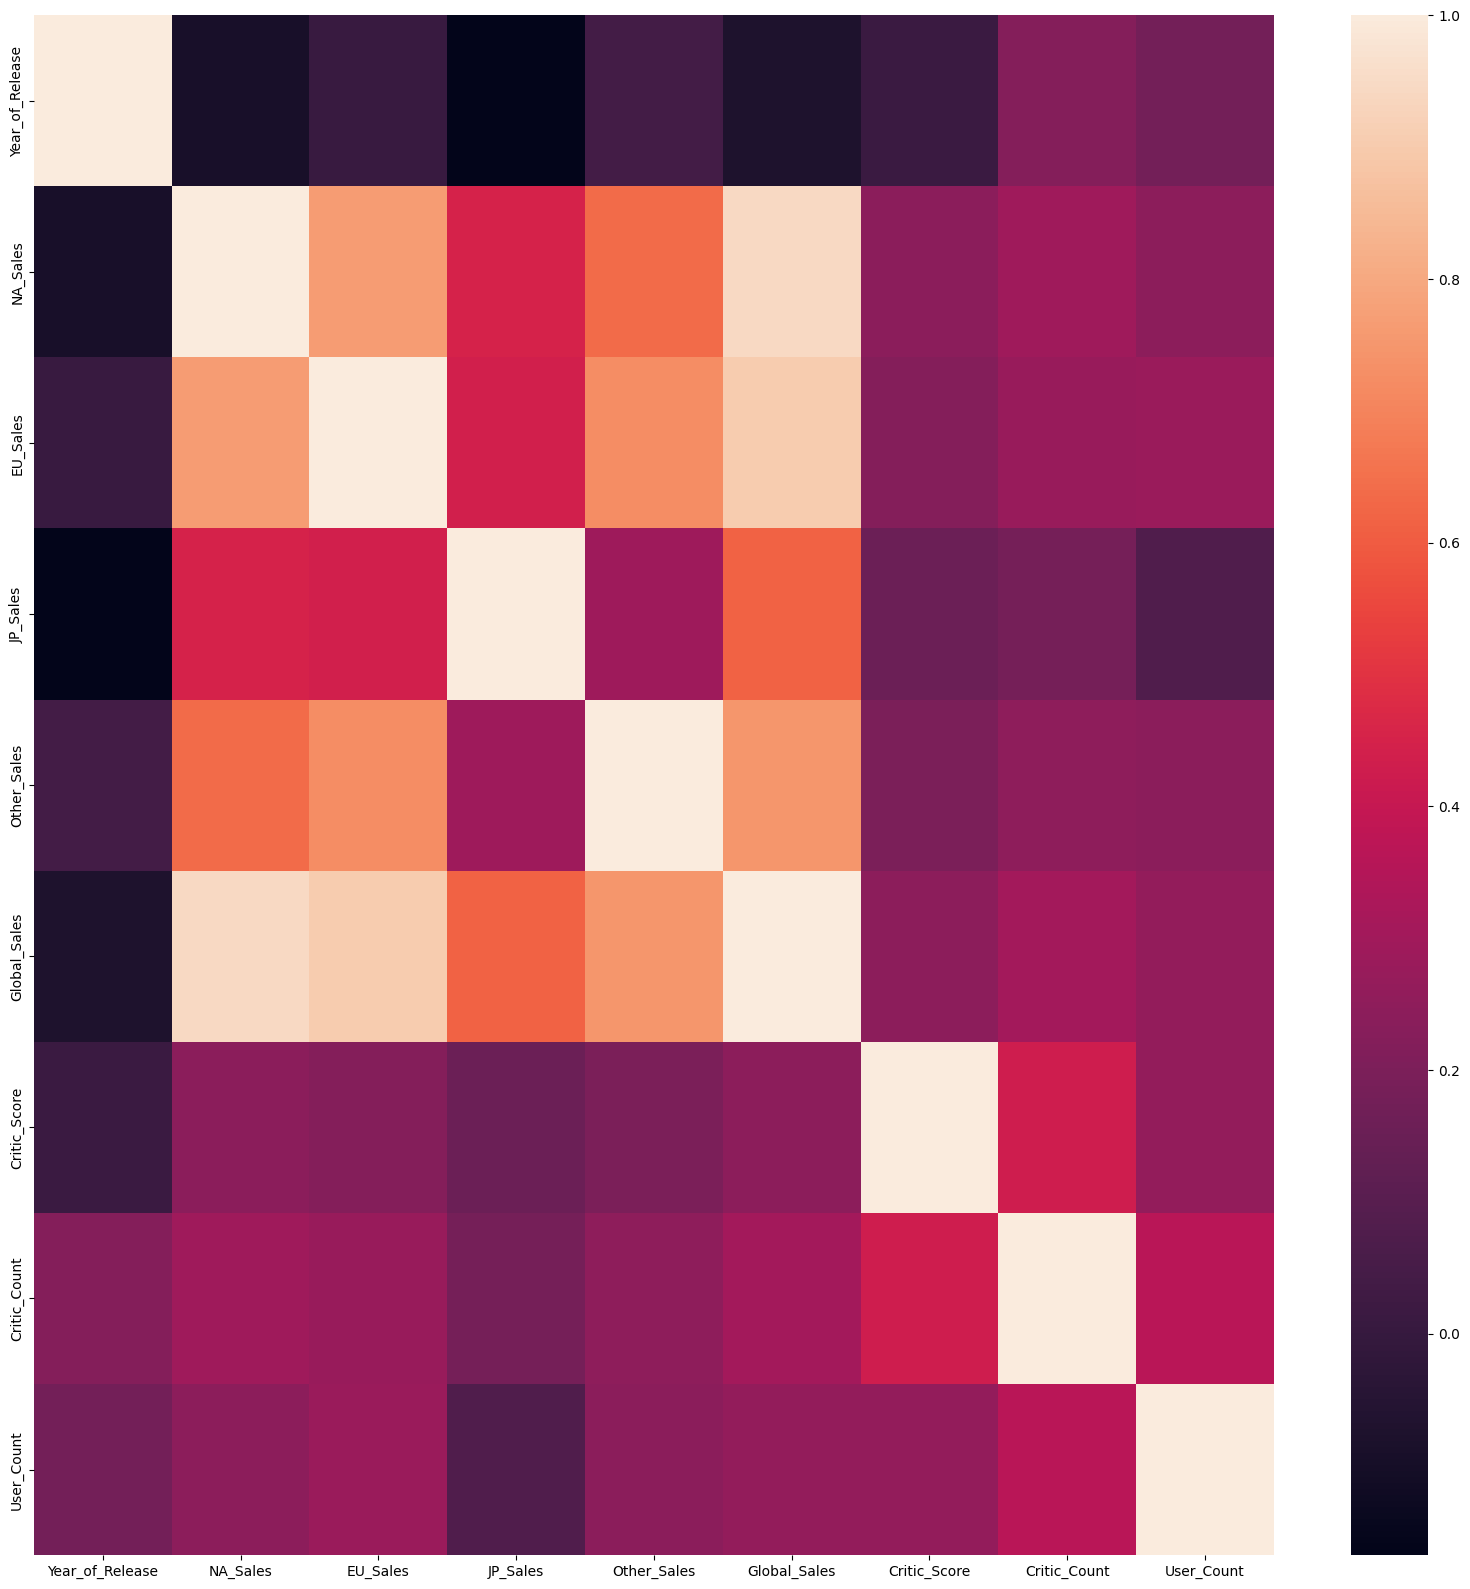

In [17]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<Axes: >

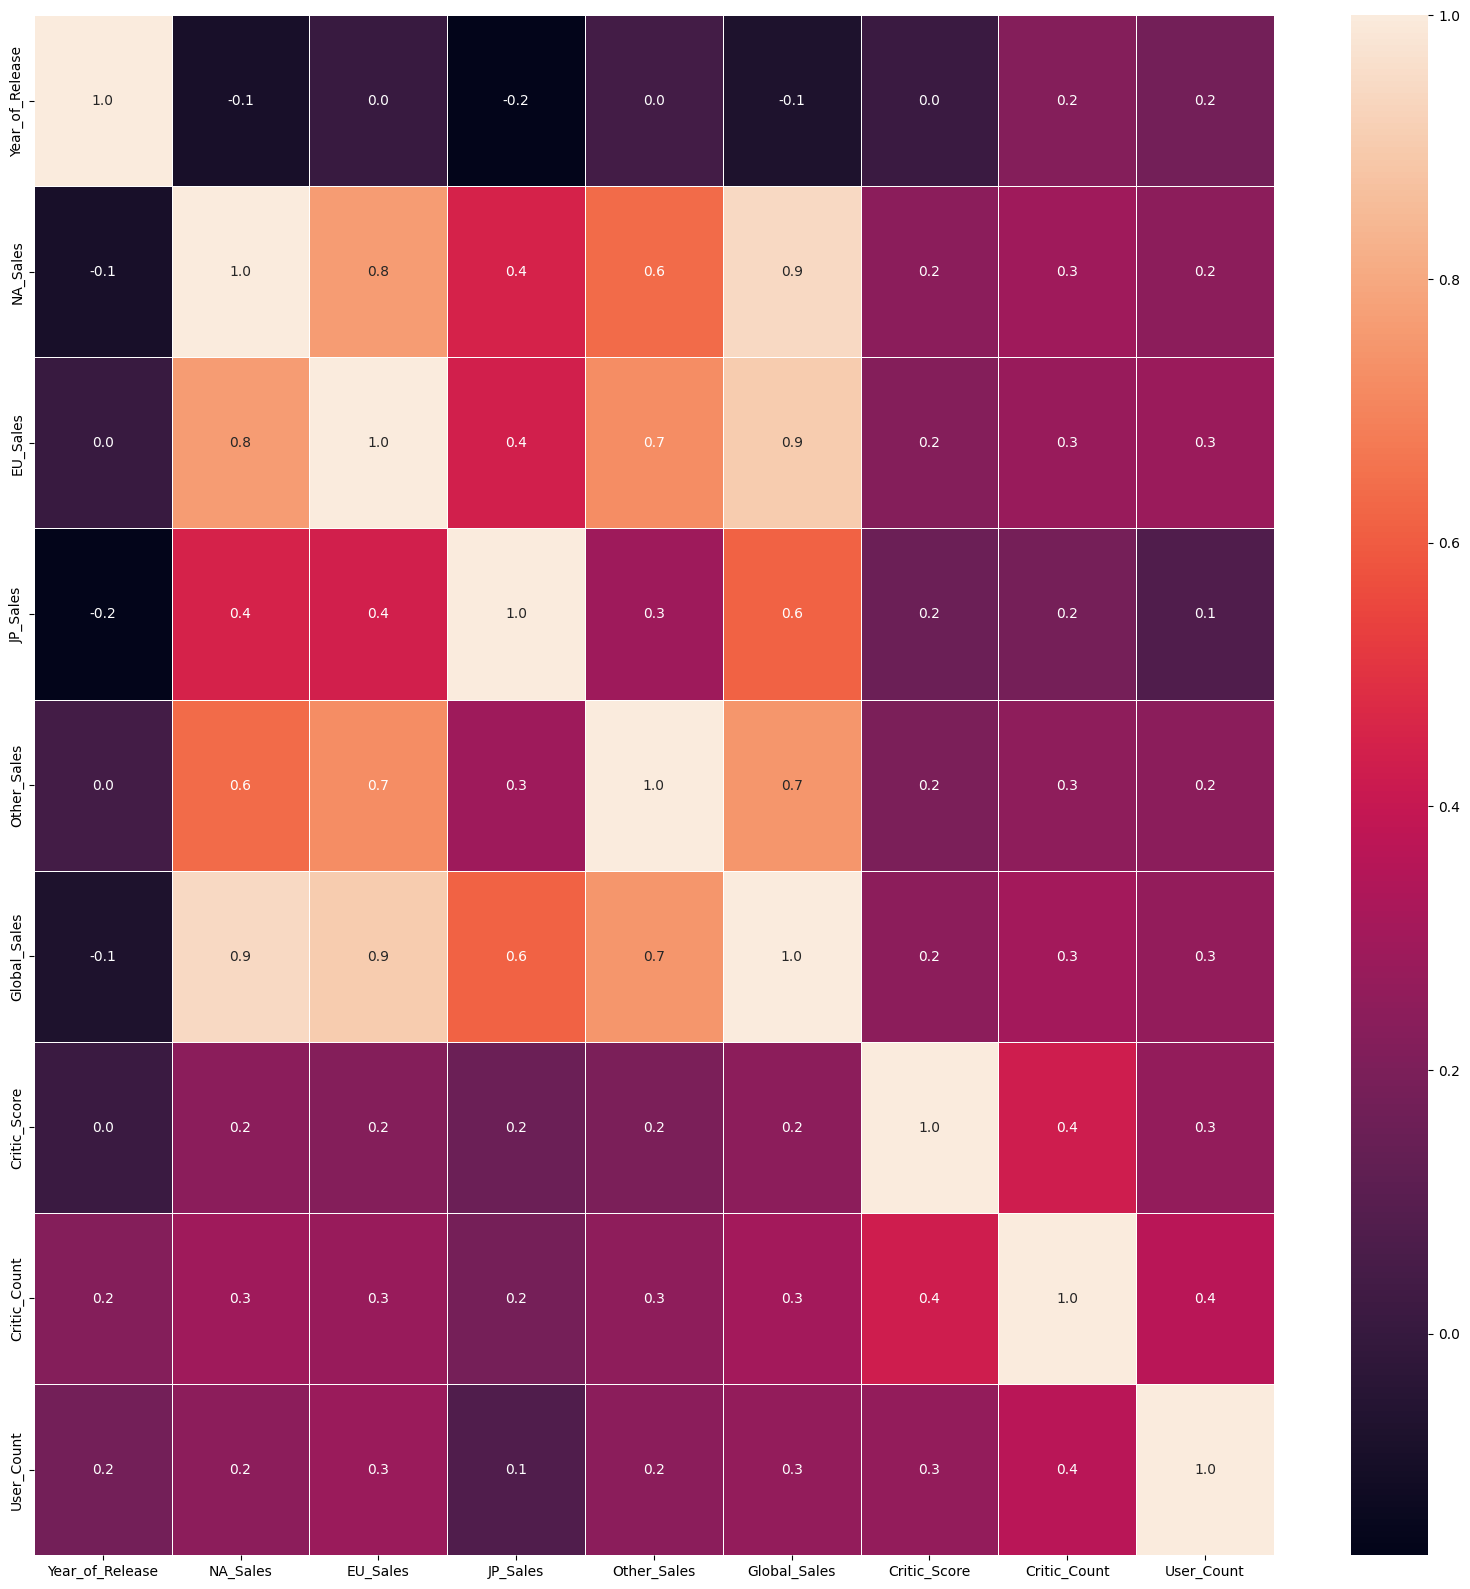

In [18]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

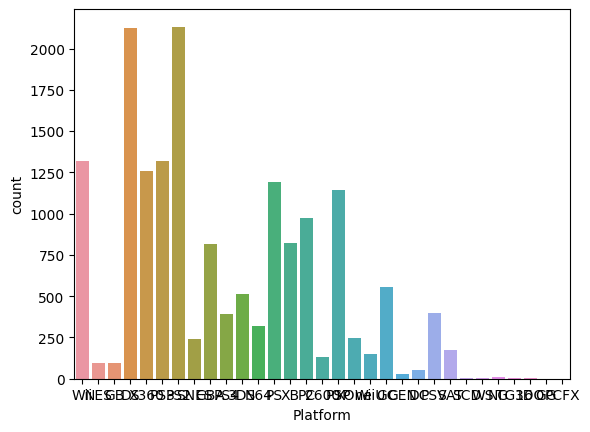

<Figure size 2000x2000 with 0 Axes>

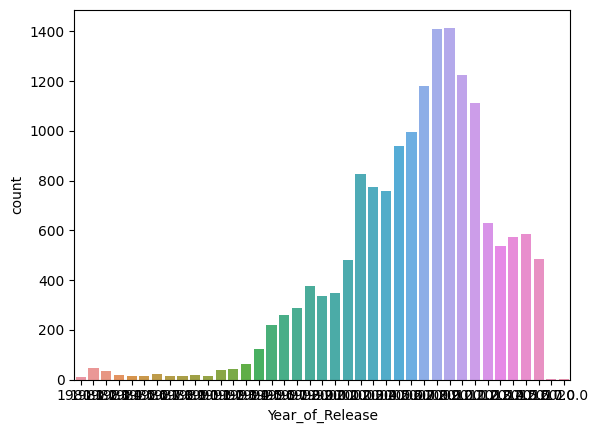

<Figure size 2000x2000 with 0 Axes>

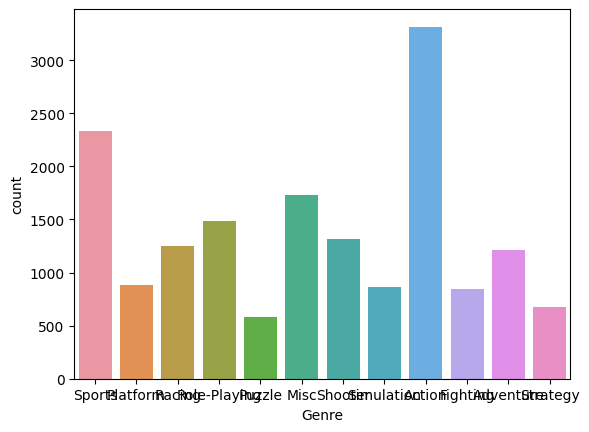

<Figure size 2000x2000 with 0 Axes>

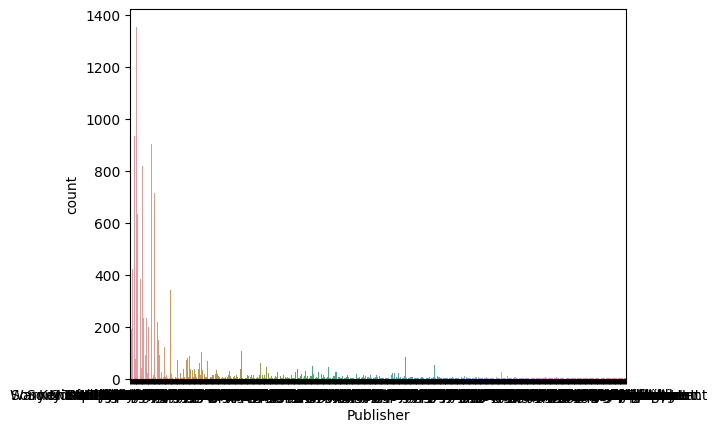

<Figure size 2000x2000 with 0 Axes>

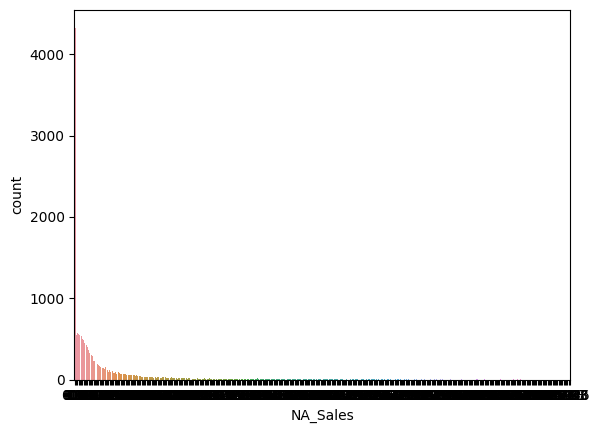

<Figure size 2000x2000 with 0 Axes>

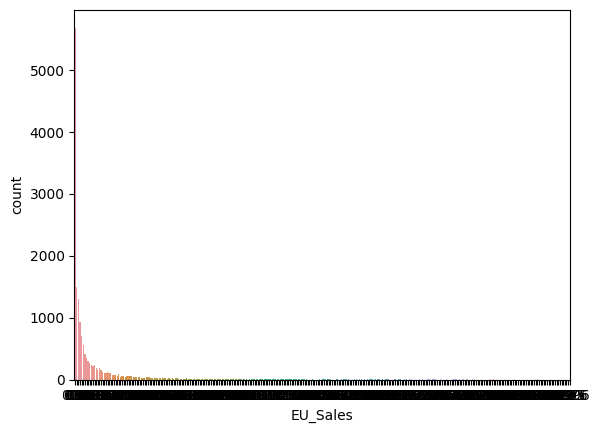

<Figure size 2000x2000 with 0 Axes>

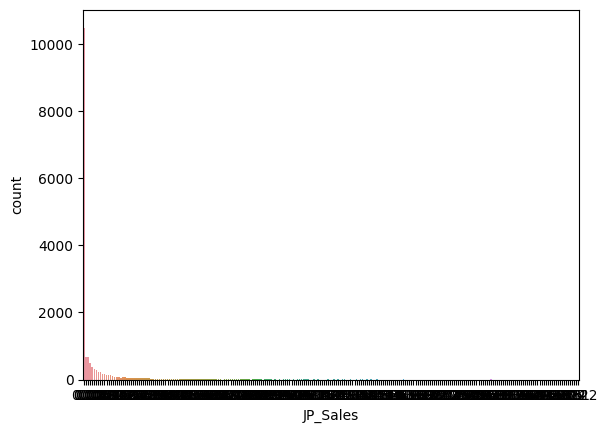

<Figure size 2000x2000 with 0 Axes>

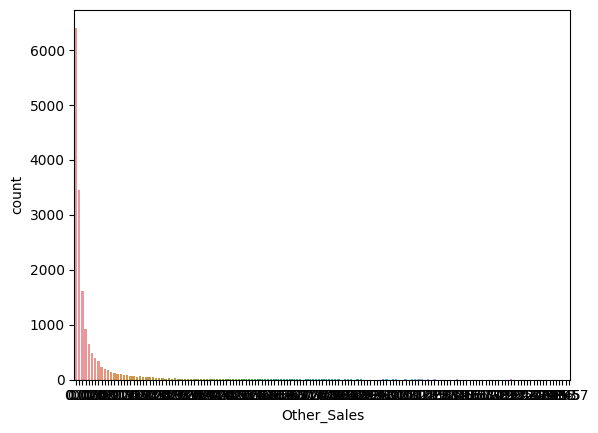

<Figure size 2000x2000 with 0 Axes>

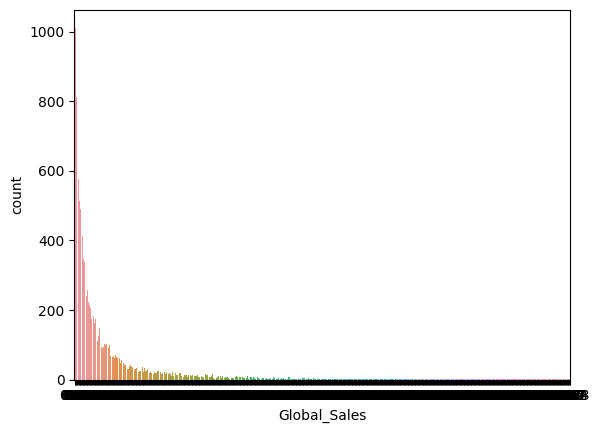

<Figure size 2000x2000 with 0 Axes>

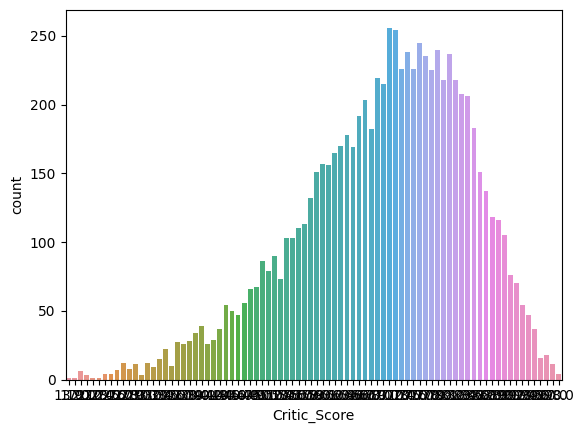

<Figure size 2000x2000 with 0 Axes>

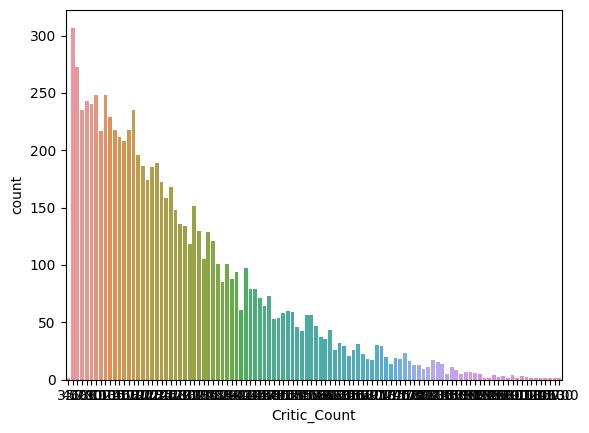

<Figure size 2000x2000 with 0 Axes>

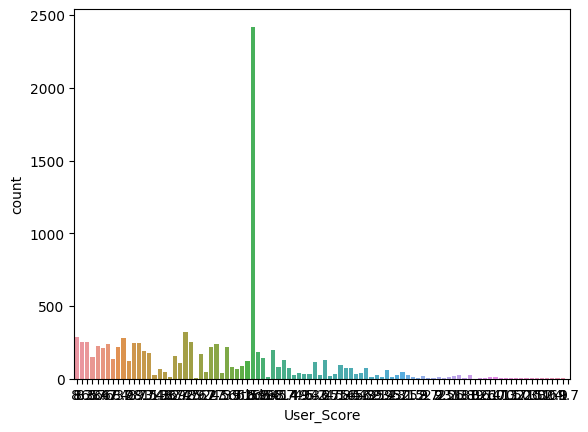

<Figure size 2000x2000 with 0 Axes>

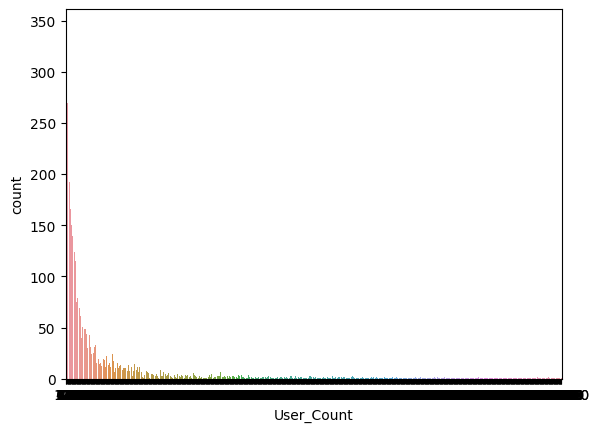

<Figure size 2000x2000 with 0 Axes>

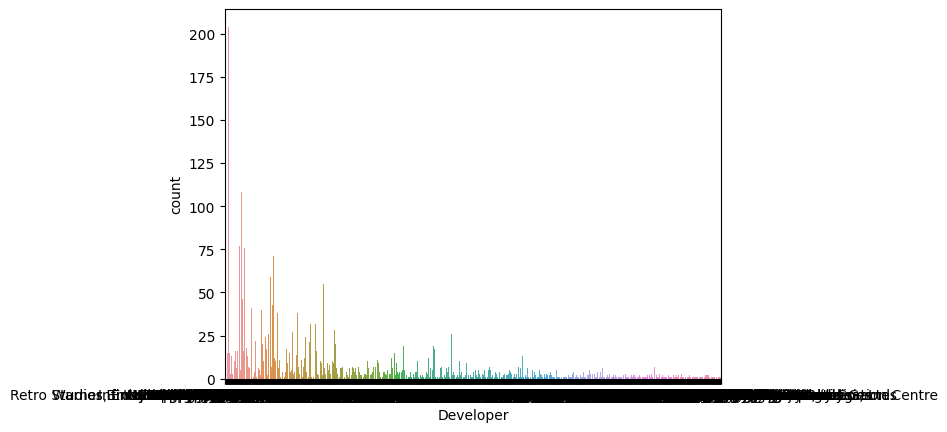

<Figure size 2000x2000 with 0 Axes>

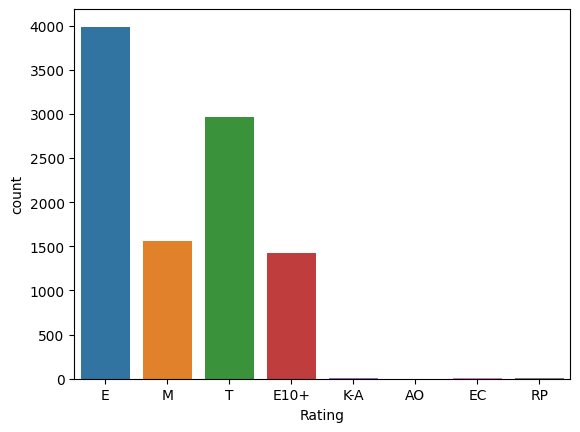

<Figure size 2000x2000 with 0 Axes>

In [19]:
# Original data.
for i in df.loc[:, ~df.columns.isin(["Date", "Volume"])]:
    f = sns.countplot(x=df[i]);
    plt.figure(figsize=(20,20))
    plt.show()

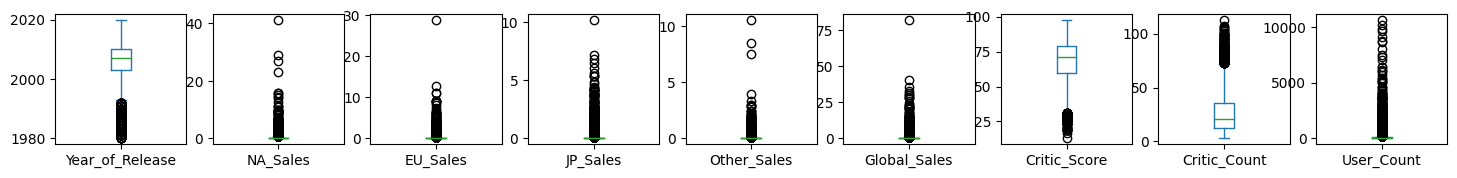

In [20]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

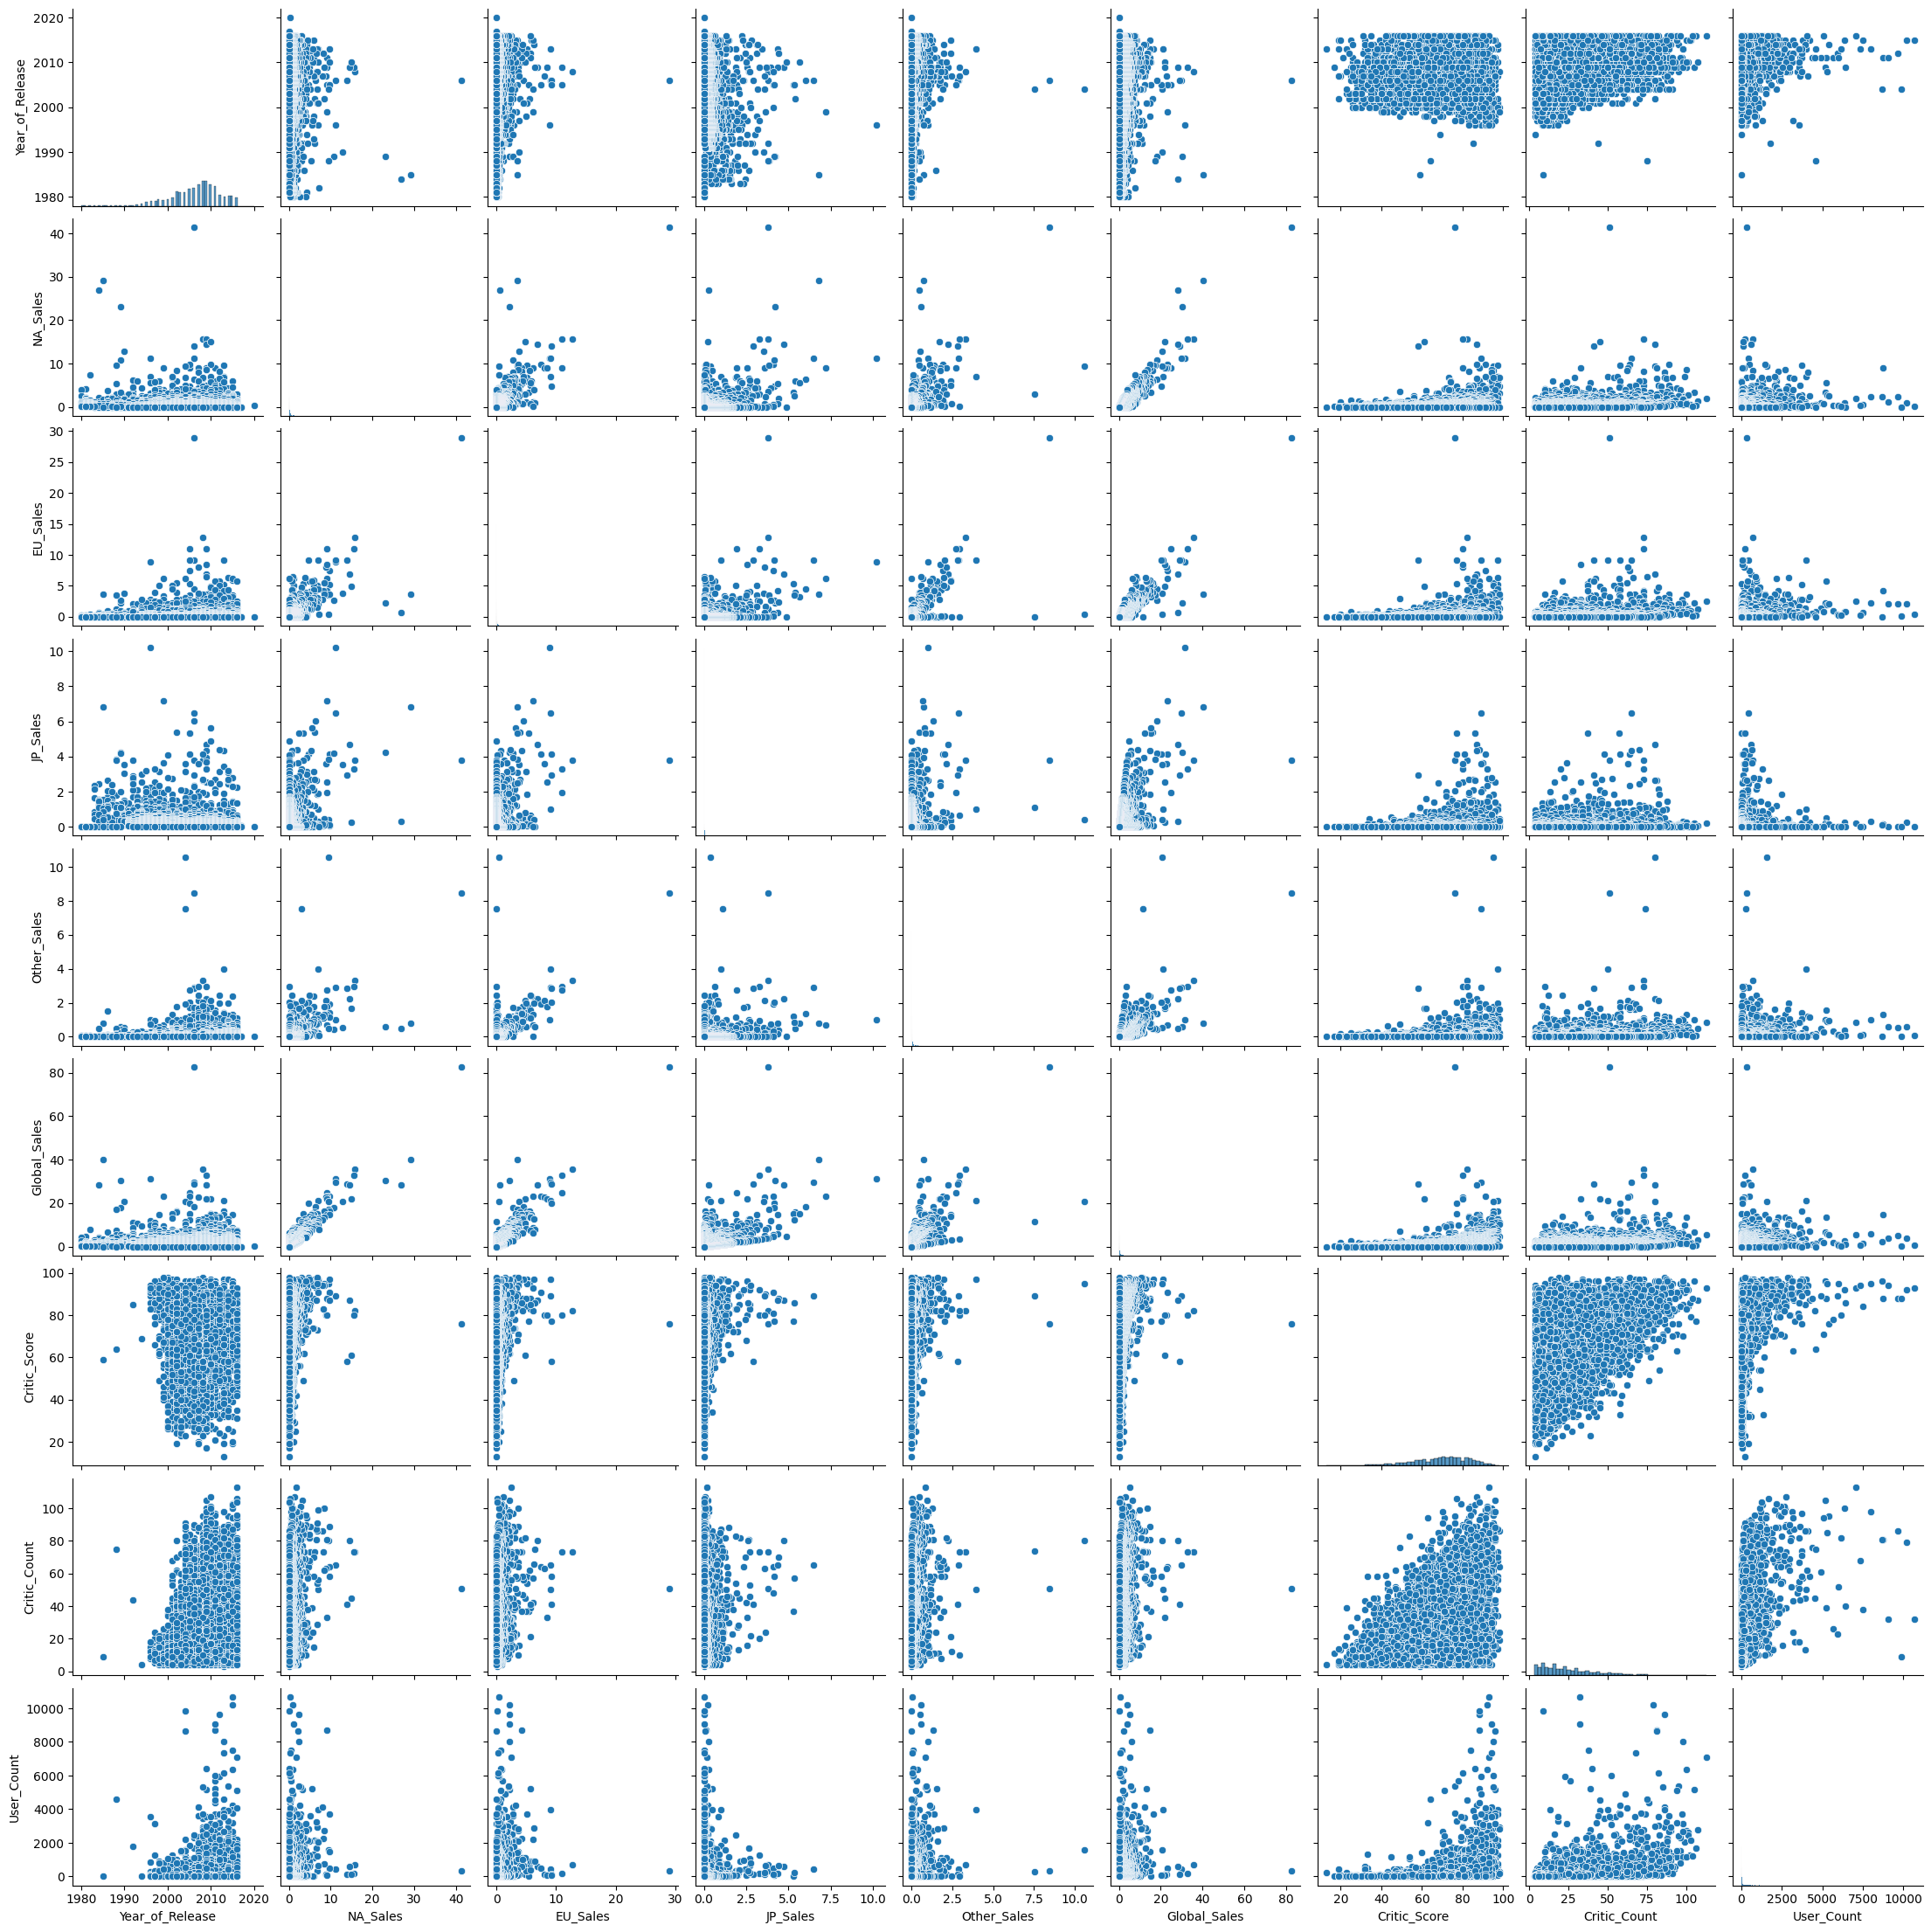

In [21]:
sns.pairplot(df)

# Splitting

In [22]:
train_data = data.dropna(subset=['Rating'])
train_data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16706,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+
16708,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games,E


In [23]:
test_data = data[data['Rating'].isna()]
test_data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
test_data = test_data.drop('Rating', axis=1)
test_data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
9,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN
10,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16713,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


# Define dependant & independant

In [25]:
dataa = train_data.drop(['Rating'],axis=1)
dataa

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation
16702,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon
16706,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin
16708,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games


In [26]:
y_dataa = train_data['Rating']
y_dataa

0           E
2           E
3           E
6           E
7           E
         ... 
16701       E
16702       E
16706    E10+
16708       E
16710       T
Name: Rating, Length: 9945, dtype: object

In [27]:
y_dataa = pd.DataFrame(y_dataa)
y_dataa

,Rating
0,E
2,E
3,E
6,E
7,E
...,...
16701,E
16702,E
16706,E10+
16708,E


# Preprocessing

## Label Encoding

In [28]:
# We Will do preprocessing for Label Encoding.
le = preprocessing.LabelEncoder()
lee = preprocessing.LabelEncoder()

### For Train Data

In [29]:
categorical_data = dataa[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'User_Score', 'Developer']]
categorical_data

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
0,Wii,2006.0,Sports,Nintendo,8,Nintendo
2,Wii,2008.0,Racing,Nintendo,8.3,Nintendo
3,Wii,2009.0,Sports,Nintendo,8,Nintendo
6,DS,2006.0,Platform,Nintendo,8.5,Nintendo
7,Wii,2006.0,Misc,Nintendo,6.6,Nintendo
...,...,...,...,...,...,...
16701,GC,2003.0,Puzzle,Ubisoft,tbd,Taito Corporation
16702,DS,2008.0,Puzzle,Majesco Entertainment,tbd,Interchannel-Holon
16706,PC,2011.0,Strategy,Unknown,7.2,SimBin
16708,DS,2008.0,Simulation,Destineer,tbd,Big John Games


In [30]:
numeric_data = dataa.drop(categorical_data, axis=1)
numeric_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
6,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0
7,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0
...,...,...,...,...,...,...,...,...
16701,0.01,0.00,0.00,0.00,0.01,53.0,4.0,NaN
16702,0.01,0.00,0.00,0.00,0.01,48.0,10.0,NaN
16706,0.00,0.01,0.00,0.00,0.01,60.0,12.0,13.0
16708,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [31]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
0,12,14,10,204,77,1006
2,12,16,6,204,80,1006
3,12,17,10,204,77,1006
6,2,14,4,204,82,1006
7,12,14,3,204,63,1006
...,...,...,...,...,...,...
16701,4,11,5,299,95,1413
16702,2,16,5,168,95,727
16706,5,19,11,302,69,1297
16708,2,16,9,64,95,182


In [32]:
# we Here we have created a new data frame that includes numerical_data and label_encoder.
train_data_label_encoded = pd.concat([numeric_data, label_encoder], axis=1)
train_data_label_encoded

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0,12,14,10,204,77,1006
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0,12,16,6,204,80,1006
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0,12,17,10,204,77,1006
6,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0,2,14,4,204,82,1006
7,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0,12,14,3,204,63,1006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,0.01,0.00,0.00,0.00,0.01,53.0,4.0,NaN,4,11,5,299,95,1413
16702,0.01,0.00,0.00,0.00,0.01,48.0,10.0,NaN,2,16,5,168,95,727
16706,0.00,0.01,0.00,0.00,0.01,60.0,12.0,13.0,5,19,11,302,69,1297
16708,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,2,16,9,64,95,182


In [33]:
y_train = y_dataa.apply(lee.fit_transform)
y_train

,Rating
0,1
2,1
3,1
6,1
7,1
...,...
16701,1
16702,1
16706,2
16708,1


### For Test Data

In [34]:
categorical_testdata = test_data[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'User_Score', 'Developer']]
categorical_testdata

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
1,NES,1985.0,Platform,Nintendo,NaN,NaN
4,GB,1996.0,Role-Playing,Nintendo,NaN,NaN
5,GB,1989.0,Puzzle,Nintendo,NaN,NaN
9,NES,1984.0,Shooter,Nintendo,NaN,NaN
10,DS,2005.0,Simulation,Nintendo,NaN,NaN
...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,NaN,NaN
16713,PS2,2008.0,Racing,Activision,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,NaN,NaN


In [35]:
numeric_testdata = test_data.drop(categorical_testdata, axis=1)
numeric_testdata

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
5,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN
9,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN
10,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16712,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN
16713,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN
16715,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16717,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [36]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
testlabel_encoder=categorical_testdata.apply(le.fit_transform)
testlabel_encoder

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
1,11,5,4,296,42,106
4,5,16,7,296,42,106
5,5,9,5,296,42,106
9,11,4,8,296,42,106
10,4,25,9,296,42,106
...,...,...,...,...,...,...
16712,6,22,4,227,42,106
16713,16,28,6,20,42,106
16715,28,26,10,84,42,106
16717,6,23,4,448,42,106


In [37]:
# we Here we have created a new data frame that includes numeric_testdata and testlabel_encoder.
test_data_label_encoded = pd.concat([numeric_testdata, testlabel_encoder], axis=1)
test_data_label_encoded

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,11,5,4,296,42,106
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,5,16,7,296,42,106
5,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,5,9,5,296,42,106
9,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,11,4,8,296,42,106
10,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,4,25,9,296,42,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,6,22,4,227,42,106
16713,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,16,28,6,20,42,106
16715,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,28,26,10,84,42,106
16717,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,6,23,4,448,42,106


## Define Missing Data

### Train Data

In [38]:
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean' )

In [39]:
z = imputer.fit_transform(train_data_label_encoded) #X.values returns np array of the value of X data frame, z's type is np array
z

array([[4.136e+01, 2.896e+01, 3.770e+00, ..., 2.040e+02, 7.700e+01,
        1.006e+03],
       [1.568e+01, 1.276e+01, 3.790e+00, ..., 2.040e+02, 8.000e+01,
        1.006e+03],
       [1.561e+01, 1.093e+01, 3.280e+00, ..., 2.040e+02, 7.700e+01,
        1.006e+03],
       ...,
       [0.000e+00, 1.000e-02, 0.000e+00, ..., 3.020e+02, 6.900e+01,
        1.297e+03],
       [1.000e-02, 0.000e+00, 0.000e+00, ..., 6.400e+01, 9.500e+01,
        1.820e+02],
       [1.000e-02, 0.000e+00, 0.000e+00, ..., 1.320e+02, 9.500e+01,
        1.200e+02]])

### Test Data

In [40]:
z_test = imputer.transform(test_data_label_encoded)
z_test

array([[2.908e+01, 3.580e+00, 6.810e+00, ..., 2.960e+02, 4.200e+01,
        1.060e+02],
       [1.127e+01, 8.890e+00, 1.022e+01, ..., 2.960e+02, 4.200e+01,
        1.060e+02],
       [2.320e+01, 2.260e+00, 4.220e+00, ..., 2.960e+02, 4.200e+01,
        1.060e+02],
       ...,
       [0.000e+00, 1.000e-02, 0.000e+00, ..., 8.400e+01, 4.200e+01,
        1.060e+02],
       [1.000e-02, 0.000e+00, 0.000e+00, ..., 4.480e+02, 4.200e+01,
        1.060e+02],
       [0.000e+00, 0.000e+00, 1.000e-02, ..., 4.120e+02, 4.200e+01,
        1.060e+02]])

## Scale

In [41]:
scaler = MinMaxScaler()

In [42]:
x_train = scaler.fit_transform(z)
x_train

array([[1.00000000e+00, 1.00000000e+00, 5.80000000e-01, ...,
        6.14457831e-01, 8.02083333e-01, 6.02756141e-01],
       [3.79110251e-01, 4.40607735e-01, 5.83076923e-01, ...,
        6.14457831e-01, 8.33333333e-01, 6.02756141e-01],
       [3.77417795e-01, 3.77417127e-01, 5.04615385e-01, ...,
        6.14457831e-01, 8.02083333e-01, 6.02756141e-01],
       ...,
       [0.00000000e+00, 3.45303867e-04, 0.00000000e+00, ...,
        9.09638554e-01, 7.18750000e-01, 7.77112043e-01],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.92771084e-01, 9.89583333e-01, 1.09047334e-01],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        3.97590361e-01, 9.89583333e-01, 7.18993409e-02]])

In [43]:
x_test = scaler.transform(z_test)
x_test

array([[7.03094778e-01, 1.23618785e-01, 1.04769231e+00, ...,
        8.91566265e-01, 4.37500000e-01, 6.35110845e-02],
       [2.72485493e-01, 3.06975138e-01, 1.57230769e+00, ...,
        8.91566265e-01, 4.37500000e-01, 6.35110845e-02],
       [5.60928433e-01, 7.80386740e-02, 6.49230769e-01, ...,
        8.91566265e-01, 4.37500000e-01, 6.35110845e-02],
       ...,
       [0.00000000e+00, 3.45303867e-04, 0.00000000e+00, ...,
        2.53012048e-01, 4.37500000e-01, 6.35110845e-02],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.34939759e+00, 4.37500000e-01, 6.35110845e-02],
       [0.00000000e+00, 0.00000000e+00, 1.53846154e-03, ...,
        1.24096386e+00, 4.37500000e-01, 6.35110845e-02]])

# Machine Learning Models

## LogisticRegression

In [44]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_logistic = LogisticRegression(random_state=1)

In [45]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our
# x_train and y_train variables
model_logistic.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [46]:
# Making Predictions With Our Logistic Regression Model
predictions_logistic = model_logistic.predict(x_test)

In [47]:
predictions_logistic

array([1, 1, 1, ..., 5, 1, 2])

## Naive Bayes

In [48]:
# we assign the output to an object called model.
model_nb = GaussianNB()

In [49]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
model_nb.fit(x_train, y_train)

GaussianNB()

In [50]:
predicted_nb = model_nb.predict(x_test)

# Deep Learning Model

In [51]:
tf.random.set_seed(500)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(14, )),
        layers.Dense(1600, activation="relu", name="hiddenlayer"),
        layers.Dense(1500, activation="relu", name="hiddenlayer1"),
        layers.Dense(1400, activation="relu", name="hiddenlayer2"),
        layers.Dense(1300, activation="relu", name="hiddenlayer3"),
        layers.Dense(1200, activation="relu", name="hiddenlayer4"),
        layers.Dense(1100, activation="relu", name="hiddenlayer5"),
        layers.Dense(1000, activation="relu", name="hiddenlayer6"),
        layers.Dense(900, activation="relu", name="hiddenlayer7"),
        layers.Dense(800, activation="relu", name="hiddenlayer8"),
        layers.Dense(700, activation="relu", name="hiddenlayer9"),
        layers.Dense(600, activation="relu", name="hiddenlayer10"),
        layers.Dense(500, activation="relu", name="hiddenlayer11"),
        layers.Dense(400, activation="relu", name="hiddenlayer12"),
        layers.Dense(300, activation="relu", name="hiddenlayer13"),
        layers.Dense(200, activation="relu", name="hiddenlayer14"),
        layers.Dense(100, activation="relu", name="hiddenlayer15"),
        layers.Dense(50, activation="relu", name="hiddenlayer16"),
        layers.Dense(8, activation="softmax", name="outputlayer"),
    ]
)

In [52]:
# Look at model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer (Dense)         (None, 1600)              24000     
                                                                 
 hiddenlayer1 (Dense)        (None, 1500)              2401500   
                                                                 
 hiddenlayer2 (Dense)        (None, 1400)              2101400   
                                                                 
 hiddenlayer3 (Dense)        (None, 1300)              1821300   
                                                                 
 hiddenlayer4 (Dense)        (None, 1200)              1561200   
                                                                 
 hiddenlayer5 (Dense)        (None, 1100)              1321100   
                                                                 
 hiddenlayer6 (Dense)        (None, 1000)              1

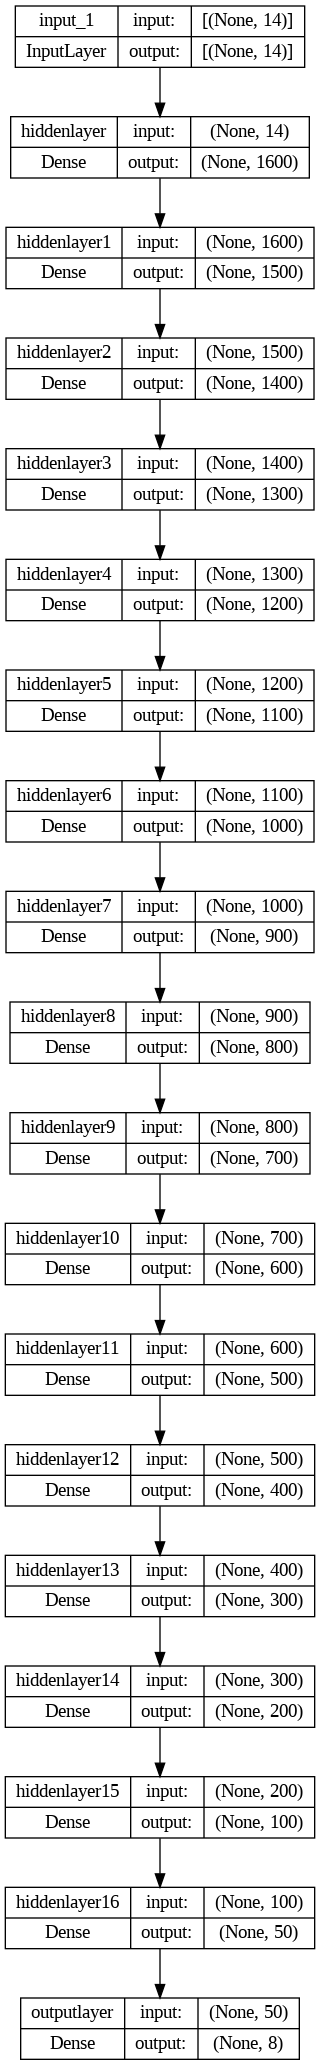

In [53]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file= 'model_plot.png', show_shapes = True, show_layer_names=True)

In [54]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [55]:
model_training = model.fit(x=x_train, y=y_train, batch_size=32, verbose=1, epochs=50)

Epoch 1/50
311/311 [==============================] - 15s 8ms/step - loss: 1.3306 - accuracy: 0.3947
Epoch 2/50
311/311 [==============================] - 3s 9ms/step - loss: 1.2525 - accuracy: 0.4303
Epoch 3/50
311/311 [==============================] - 2s 7ms/step - loss: 1.1935 - accuracy: 0.4768
Epoch 4/50
311/311 [==============================] - 2s 7ms/step - loss: 1.1685 - accuracy: 0.4960
Epoch 5/50
311/311 [==============================] - 2s 7ms/step - loss: 1.1838 - accuracy: 0.4904
Epoch 6/50
311/311 [==============================] - 2s 7ms/step - loss: 1.1670 - accuracy: 0.5028
Epoch 7/50
311/311 [==============================] - 3s 9ms/step - loss: 1.1271 - accuracy: 0.5180
Epoch 8/50
311/311 [==============================] - 3s 8ms/step - loss: 1.1753 - accuracy: 0.4952
Epoch 9/50
311/311 [==============================] - 2s 7ms/step - loss: 1.1128 - accuracy: 0.5250
Epoch 10/50
311/311 [==============================] - 2s 7ms/step - loss: 1.0859 - accuracy: 0.540

In [56]:
# History
pd.DataFrame(model_training.history)

,loss,accuracy
0,1.330633,0.394671
1,1.252475,0.430266
2,1.193469,0.476823
3,1.168458,0.496028
4,1.183828,0.490397
5,1.166951,0.502765
6,1.127131,0.518049
7,1.175330,0.495224
8,1.112798,0.524987
9,1.085938,0.540674


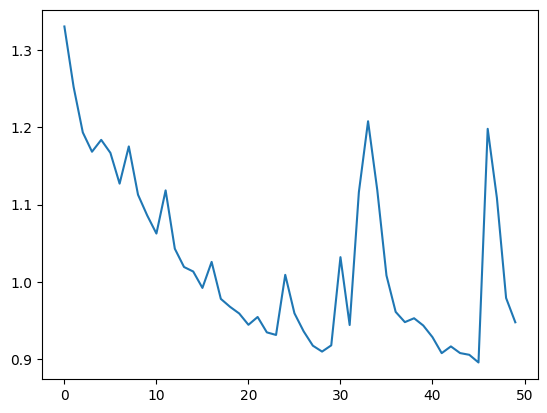

In [57]:
# Plot the Losses
plt.plot(model_training.history['loss'])

In [58]:
# Predection
pred = model.predict(x_test).argmax(axis=-1)
pred

206/206 [==============================] - 1s 2ms/step


array([1, 1, 1, ..., 1, 1, 1])